## Week0-Assignment
뉴스 기사를 전처리하여 워드 클라우드 생성하기
1. 텍스트 정제
2. 토크나이징
3. 워드클라우드 생성

```
코드는 자유롭게 수정해도 좋습니다! 관심 있는 검색어로 검색한 기사에 대한 워드클라우드를 생성하시길 바랍니다.
```

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

!pip install soynlp
!pip install konlpy
!pip install wordcloud



     |████████████████████████████████| 419kB 5.3MB/s 
     |████████████████████████████████| 19.4MB 29.2MB/s 
     |████████████████████████████████| 460kB 37.4MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### A. 한글 기사

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
def get_link(query):
    url = "https://search.naver.com/search.naver?"

    params = {
        # 탭
        "where": 'news',

        # 검색어
        "query": query,

        # 페이지
        "start": 0,
    }

    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}, params=params)
    soup = BeautifulSoup(response.text, "html.parser")
  
    url_list = []

    for i in soup.select('div.info_group > a'):
        if re.search('news.naver.com', i['href']):
            url_list.append(i['href'])

    return url_list

def get_article(url_list):

    article_list = []

    for url in url_list:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text, "html.parser")

        article = soup.select_one('#articleBodyContents').text.strip()
        article_list.append(article)
    return article_list

In [ ]:
query = input("검색어(한글)를 입력해주세요: ")
news_link = get_link(query)
print(news_link)
print()
news_article = get_article(news_link)
news_article

검색어(한글)를 입력해주세요: 백신
['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=001&aid=0012240402', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=018&aid=0004867580', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=023&aid=0003599533', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=215&aid=0000941436', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=020&aid=0003342303', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=079&aid=0003475313', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=277&aid=0004858917', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=014&aid=0004594836', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003558085', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=023&aid=0003599580']



['// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n5명 모두 AZ백신 접종…"어제 사망한 2명 \'접종 기피\' 대상 아냐"코로나19 백신 접종[연합뉴스 자료 사진](서울=연합뉴스) 신선미 기자 = 국내에서 신종 코로나바이러스 감염증(코로나19) 백신을 접종받은 뒤 사망하는 사례가 잇따르고 있다.    4일 코로나19 예방접종 대응 추진단에 따르면 이날 0시 이후 코로나19 백신을 접종받은 뒤 사망한 사람이 3명 추가돼 누적 5명으로 늘었다.    사망한 5명 모두 아스트라제네카 백신을 맞았다.    추진단과 각 지방자치단체의 발표에 따르면 이날 추가된 사망자 3명 중 2명은 전북지역 요양병원 2곳에서, 나머지 1명은 대전 중증장애시설에서 각각 나왔다.    전북 지역 사망자 2명은 50대 기저질환자 남성으로, 이 가운데 1명은 전주시 소재 요양병원 입원자다.    지난 2일 오전 9시께 백신을 접종했으며 41시간 뒤인 이날 오전 2시께 사망했다. 심뇌혈관 질환을 앓았던 이 사망자는 지난해 6월 뇌출혈이 발병한 것으로 알려졌다.    다른 1명은 부안군 소재 요양병원에 입원해 있던 사람으로, 심근경색과 당뇨 등의 질환이 있었다. 지난 3일 오전 11시께 백신을 맞고 15시간이 경과한 이날 오전 2시께 숨졌다.    대전 중증장애시설 입소자인 20대 여성은 지난 2일 접종을 받은 뒤 42시간이 지나 이날 오전 5시 30분께 사망했다.     추진단은 이날 추가로 확인된 3명의 사인이 예방 접종과 관련이 있는지에 대해 역학조사를 진행하고 있다.    앞서 전날 경기도 고양과 평택에서도 백신 접종 후 각각 1명의 사망자가 발생했다.    추진단은 현장의 의료진이 이 2명을 예진할 때 지침을 위반한 사항이 발견되지 않았고 당시 건강 상태를 보면 \'접종 기피\'에 해당할 정도가 아니었다고 밝혔다.    2명 중 1명은 장기입원환자였고, 다른 1명은 지난해 11월 입원한 환자였다.    조은희 추

In [ ]:
# Q1. 한글 텍스트 정제
def preprocessing(text):
    ###########
    #code here# 
    ###########
    return text

news_list_1 = []
for i in news_article:
    news_list_1.append(preprocessing(i))
news_list_1    

In [ ]:
# Q2. 토큰화


[['오류', '우회', '위', '함수', '추가', '명', '모두', '백신', '접종', '어제', '사망', '명', '접종', '기피', '대상', '코로나', '백신', '접종', '연합뉴스', '자료', '사진', '서울', '연합뉴스', '선미', '기자', '국내', '신종', '코로나바이러스', '감염증', '코로나', '백신', '접종', '뒤', '사망', '사례', '일', '코로나', '예방접종', '대응', '추진단', '날', '시', '이후', '코로나', '백신', '접종', '뒤', '사망', '사람', '명', '추가', '누적', '명', '사망', '명', '모두', '아스', '트', '카', '백신', '추진단', '각', '지방자치단체', '발표', '날', '추가', '사망자', '명', '중', '명', '전북', '지역', '요양', '병원', '곳', '나머지', '명', '대전', '중증', '장애', '시설', '각각', '전북', '지역', '사망자', '명', '질환', '남성', '이', '가운데', '명', '전주시', '소재', '요양', '병원', '입원', '지난', '일', '오전', '시', '백신', '접종', '시간', '뒤', '날', '오전', '시', '사망', '심뇌', '혈관', '질환', '이', '사망자', '지난해', '월', '뇌출혈', '발병', '것', '다른', '명', '부안군', '소재', '병원', '입원', '사람', '심근경색', '당뇨', '등', '질환', '지난', '일', '오전', '시', '백신', '시간', '경과', '날', '오전', '시', '대전', '중증', '장애', '시설', '입소', '여성', '지난', '일', '접종', '뒤', '시간', '지나', '날', '오전', '시', '분', '사망', '추진단', '날', '추가', '확인', '명의', '사인', '예방', '접종', '관련', '대해', '역학', '조사',

In [ ]:
stopwords = [""] # optional

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor='white', width=800, height=400):
  wordcloud = WordCloud(
      font_path = fontpath,
      stopwords = stopwords,
      background_color = backgroundcolor,
      collocations = False,
      width = width, height = height).generate(data)
  plt.figure(figsize = (15,8))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

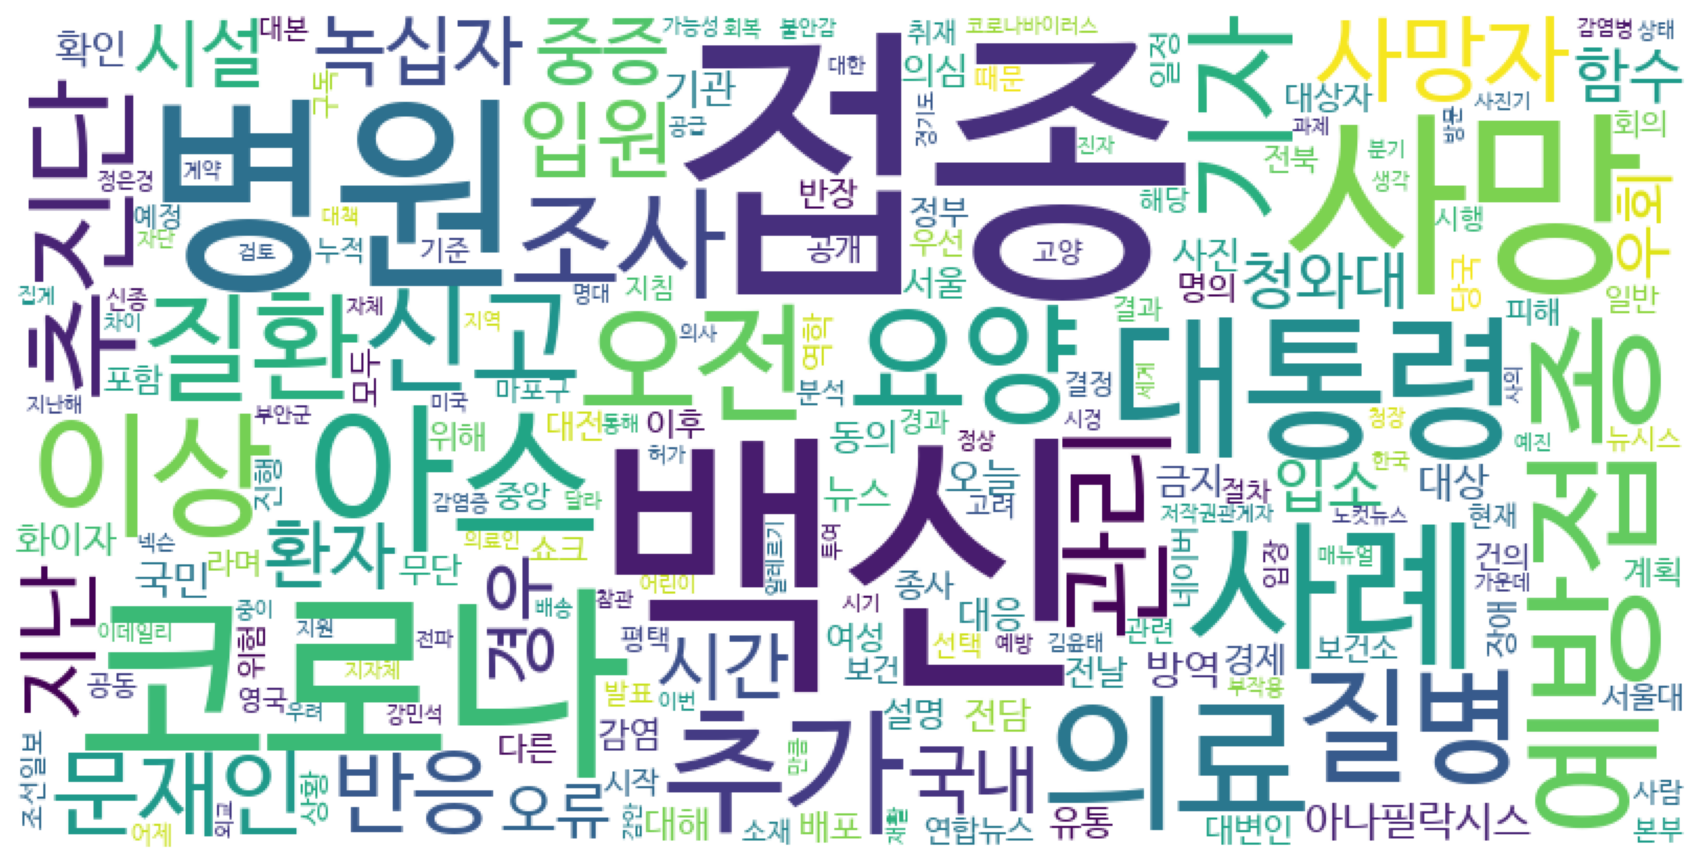

In [ ]:
news_list_2 = sum(news_list_2, [])
displayWordCloud(' '.join(news_list_2))

### B. 영어 기사 

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
def get_link(query):
    url = 'https://www.nytimes.com/search?dropmab=false&query={}&sort=best&types=article'.format(query)
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, "html.parser")
    plus_link = soup.select_one('div.css-e1lvw9 > a')['href']
    link = 'https://www.nytimes.com' + plus_link
    return link

def get_article(url):

    article_list = []
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, "html.parser")
    for i in soup.select('div.css-53u6y8 > p.css-axufdj'):
        article_list.append(i.text)

    return ' '.join(article_list)

In [ ]:
query = input("검색어(영어)를 입력해주세요: ")
news_link = get_link(query)
print(news_link)
print()
news_article = get_article(news_link)
news_article

검색어(영어)를 입력해주세요: Clubhouse
https://www.nytimes.com/2021/02/25/technology/clubhouse-audio-app-experience.html?searchResultPosition=1



'A few nights ago, after my weekly trip to the grocery store, I sat in my car glued to Clubhouse, the invitation-only social audio app. While my ice cream thawed in the trunk, I dropped in on a room where Tom Green, the former MTV shock comedian and star of “Freddy Got Fingered,” was debating the ethics of artificial intelligence with a group of computer scientists and Deadmau5, the famous Canadian D.J. When that was over, I headed to a room called NYU Girls Roasting Tech Guys. There, I listened to college students playing a dating game in which contestants were given 30 seconds of stage time to try to seduce someone else in the audience. And after a few rounds of that, I joined a room called the Cotton Club, in which users changed their avatars to black-and-white portraits and pretended to be patrons of a 1920s-style speakeasy, complete with jazz soundtrack. Two hours later, my ice cream fully liquefied, I emerged from the car with the feeling that I had just experienced something spe

In [ ]:
# Q3. 영어 텍스트 정제
def preprocessing(text):
    ###########
    #code here# 
    ###########
    return text
    
token_list_1 = []
for i in token_list:
    token_list_1.append(preprocessing(i))
token_list_1[:10]    

In [ ]:
# Q4. 토큰화


In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords  
stopwords = stopwords.words('english')
stopwords[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

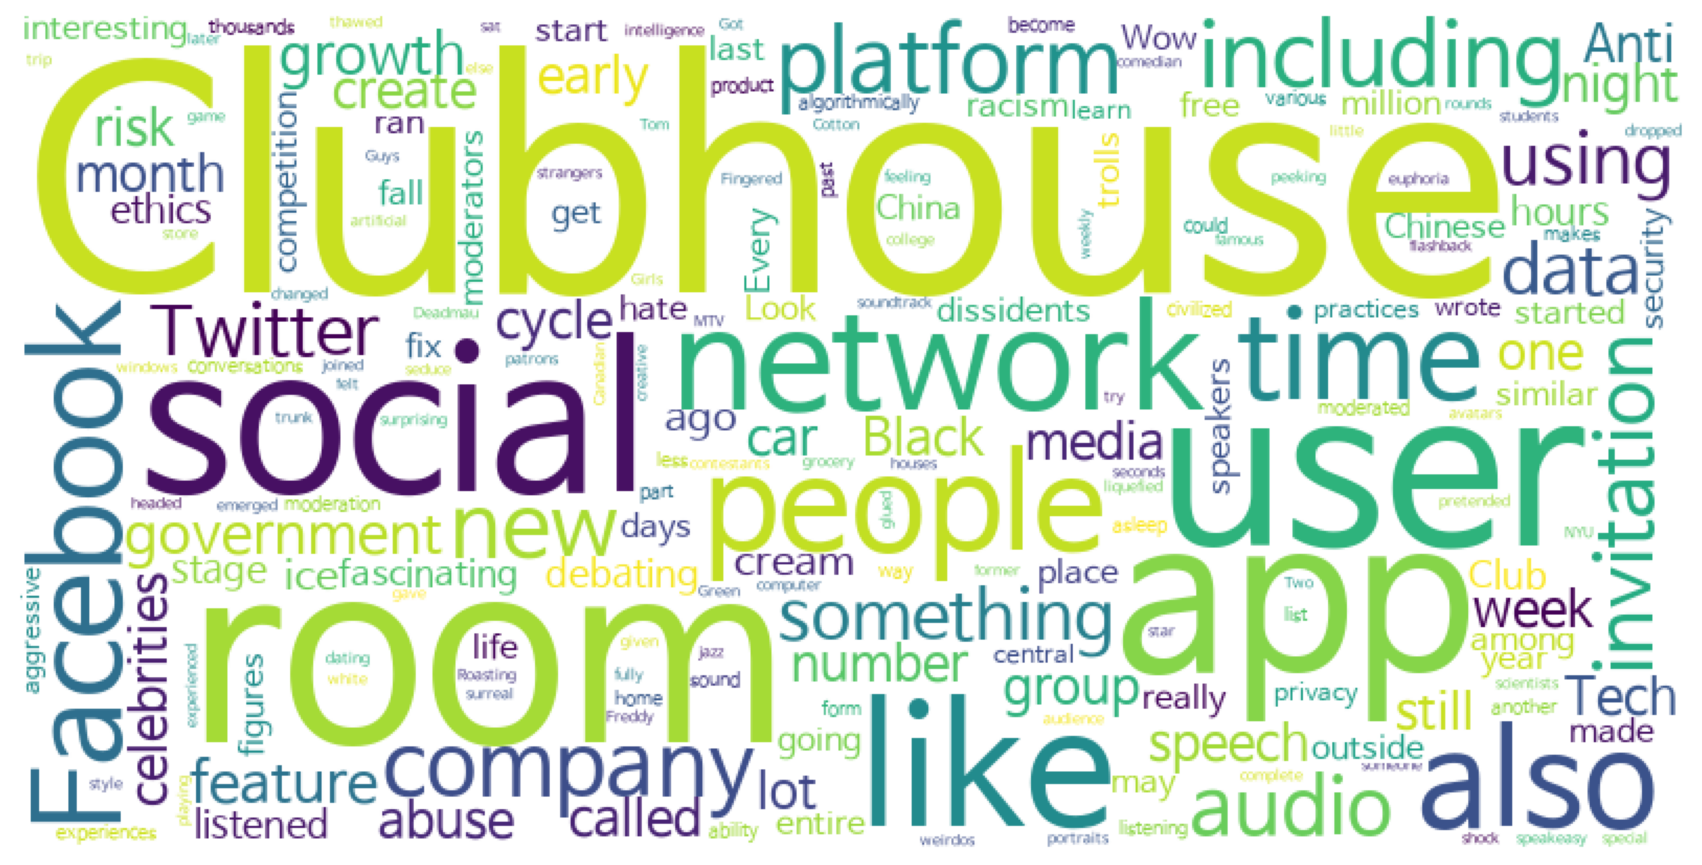

In [ ]:
displayWordCloud(' '.join(token_list_1))